## Application on FRB hosts

In [438]:
# https://github.com/krittisharma/frb_host_sharma2024/blob/main/read_transients_data.py)
import numpy as np
import pandas as pd


def read_dsa_data(only_gold=True):
    """
    Reads DSA FRBs data published in Sharma+2024, 
    filters for 'sed_done?' == 'Y' and 'sample' == 'Gold', 
    and returns the filtered DataFrame.

    Parameters:
    ----------
    only_gold : bool, optional
        If True, filters for FRBs labeled as 'Gold' in addition to 
        'sed_done?' == 'Y' (default is True).

    Returns:
    -------
    dsa_frb s : DataFrame
        Filtered DataFrame containing DSA FRBs data.

    """
    # Read CSV file
    dsa_frbs = pd.read_csv("frbs_data/dsa_frbs.csv")
    
    if only_gold:
        dsa_frbs = dsa_frbs[np.logical_and(dsa_frbs["sed_done?"] == "Y", dsa_frbs["sample"] == "Gold")]
    else:
        dsa_frbs = dsa_frbs[dsa_frbs["sed_done?"] == "Y"]
    
    # Compute logarithmic errors for ssfr
    dsa_frbs["ssfr_errl"] = np.log10(dsa_frbs["ssfr"] + dsa_frbs["ssfr_errl"]) - np.log10(dsa_frbs["ssfr"])
    dsa_frbs["ssfr_erru"] = np.log10(dsa_frbs["ssfr"] + dsa_frbs["ssfr_erru"]) - np.log10(dsa_frbs["ssfr"])
    
    # Compute logarithm of ssfr
    dsa_frbs["ssfr"] = np.log10(dsa_frbs["ssfr"])
    
    return dsa_frbs


def read_chime_data():
    """
    Reads CHIME FRBs data from Bhardwaj+2023 and returns the DataFrame.

    Returns:
    -------
    chime_frbs : DataFrame
        DataFrame containing CHIME FRBs data.
    """
    chime_frbs = pd.read_csv("frbs_data/bhardwaj_et_al.csv")
    return chime_frbs


def fix_gordon_et_al_data_format(df):
    """
    Fixes the format of Gordon+2023 data by extracting numerical values
    from LaTeX-formatted strings and assigning them to appropriate 
    columns.
    """
    logMstar, logMstar_errl, logMstar_erru = [], [], []
    sfr_100Myr, sfr_100Myr_errl, sfr_100Myr_erru = [], [], []
    tm, tm_errl, tm_erru = [], [], []
    logzsol, logzsol_errl, logzsol_erru = [], [], []
    Av, Av_errl, Av_erru = [], [], []
    
    for i in range(len(df)):
        logMstar.append(float(str(df["log(M _*/M _sun)"][i])
                              .split("$")[1].split("_")[0].split("{")[1]
                              .split("}")[0]))
        logMstar_errl.append(float(str(df["log(M _*/M _sun)"][i])
                                  .split("$")[1].split("_")[1].split("{")[1]
                                  .split("}")[0]))
        logMstar_erru.append(float(str(df["log(M _*/M _sun)"][i])
                                  .split("$")[1].split("_")[1].split("{")[2]
                                  .split("}")[0]))
        sfr_100Myr.append(float(str(df["SFR_0-100 Myr"][i])
                                .split("$")[1].split("_")[0].split("{")[1]
                                .split("}")[0]))
        sfr_100Myr_errl.append(float(str(df["SFR_0-100 Myr"][i])
                                    .split("$")[1].split("_")[1].split("{")[1]
                                    .split("}")[0]))
        sfr_100Myr_erru.append(float(str(df["SFR_0-100 Myr"][i])
                                    .split("$")[1].split("_")[1].split("{")[2]
                                    .split("}")[0]))
        tm.append(float(str(df["t _m"][i])
                        .split("$")[1].split("_")[0].split("{")[1].split("}")[0]))
        tm_errl.append(float(str(df["t _m"][i])
                            .split("$")[1].split("_")[1].split("{")[1].split("}")[0]))
        tm_erru.append(float(str(df["t _m"][i])
                            .split("$")[1].split("_")[1].split("{")[2].split("}")[0])) 
        logzsol.append(float([df["log(Z _*/Z _sun)"][i][1] if df["log(Z _*/Z _sun)"][i][1]=="-" else "+"][0]
                             +str(df["log(Z _*/Z _sun)"][i])
                             .split("$")[1].split("_")[0].split("{")[1].split("}")[0]))
        logzsol_errl.append(float(str(df["log(Z _*/Z _sun)"][i])
                                 .split("$")[1].split("_")[1].split("{")[1]
                                 .split("}")[0]))
        logzsol_erru.append(float(str(df["log(Z _*/Z _sun)"][i])
                                 .split("$")[1].split("_")[1].split("{")[2]
                                 .split("}")[0])) 
        Av.append(float(str(df["A _V,old"][i])
                        .split("$")[1].split("_")[0].split("{")[1].split("}")[0]))
        Av_errl.append(float(str(df["A _V,old"][i])
                            .split("$")[1].split("_")[1].split("{")[1].split("}")[0]))
        Av_erru.append(float(str(df["A _V,old"][i])
                            .split("$")[1].split("_")[1].split("{")[2].split("}")[0])) 
    
    df["logMstar"] = logMstar
    df["logMstar_errl"] = logMstar_errl
    df["logMstar_erru"] = logMstar_erru
    df["sfr_100Myr"] = sfr_100Myr
    df["sfr_100Myr_errl"] = sfr_100Myr_errl
    df["sfr_100Myr_erru"] = sfr_100Myr_erru
    df["t_m"] = tm
    df["t_m_errl"] = tm_errl
    df["t_m_erru"] = tm_erru
    df["Av_old"] = Av
    df["Av_old_errl"] = Av_errl
    df["Av_old_erru"] = Av_erru
    df["logzsol"] = logzsol
    df["logzsol_errl"] = logzsol_errl
    df["logzsol_erru"] = logzsol_erru
    df["ssfr"] = np.log10((sfr_100Myr/(10**np.array(logMstar)))*(1e9)) # per Gyr
    df["ssfr_errl"] = np.log10(((np.array(sfr_100Myr)+np.array(sfr_100Myr_errl))/(10**(np.array(logMstar)+np.array(logMstar_erru))))*(1e9)) - np.array(df["ssfr"]) # per Gyr
    df["ssfr_erru"] = np.log10(((np.array(sfr_100Myr)+np.array(sfr_100Myr_erru))/(10**(np.array(logMstar)+np.array(logMstar_errl))))*(1e9)) - np.array(df["ssfr"]) # per Gyr

    return df



def read_askap_frbs():
    """
    Read and return Gordon+2023 FRB host galaxies data.

    Returns:
    -------
    askap_frbs : DataFrame
        A pandas DataFrame containing the ASKAP FRBs data with additional 
        rmag and rmag_err columns, excluding FRB 20121102A.
    """
    # Read the ASKAP FRBs data from a text file
    askap_frbs = pd.read_csv("frbs_data/gordon_et_al.txt", sep="\t")
    
    # Fix the data format using a custom function
    askap_frbs = fix_gordon_et_al_data_format(askap_frbs)

    # List of r-band magnitudes
    rmags = [23.73, 21.21, 16.17, 20.33, 21.68, 21.87, 22.16, 
             17.41, 22.15, 23.54, 20.34, 18.36, 21.05, 19.95, 
             17.86, 22.97, 19.47, 20.65, 17.17, 14.96, 19.64, 
             16.44, 21.19]
    
    # List of r-band magnitude errors
    rmag_errs = [0.14, 0.06, 0.03, 0.01, 0.05, 0.10, 0.06, 
                 0.002, 0.15, 0.15, 0.03, 0.003, 0.02, 0.01,
                 0.03, 0.04, 0.02, 0.03, 0.01, 0.01, 0.03, 
                 0.01, 0.08]
    
    # Add the rmag and rmag_err columns to the DataFrame
    askap_frbs["rmag"] = rmags
    askap_frbs["rmag_err"] = rmag_errs

    # Exclude FRB 20121102A and reset the index
    askap_frbs = askap_frbs[askap_frbs["FRB"] != "20121102A"].reset_index()

    return askap_frbs

In [439]:
import numpy as np
import matplotlib.pylab as plt

import logpdfs
import emcee_utils as mc
from gc_utils import get_gc_weighted_logpdf

In [682]:
''' load FRB hosts data from Sharma et al. 2024 '''

dsa_frbs = read_dsa_data()
askap_frbs = read_askap_frbs()
chime_frbs = read_chime_data()

dsa_frbs = dsa_frbs.rename(columns={'FRB_TNS_name': 'FRB', 'redshift': 'z'})
dsa_frbs['FRB'] = [x.strip('FRB ') for x in dsa_frbs['FRB']]

cols = ['FRB', 'z', 'logMstar', 'logMstar_erru', 'logMstar_errl', 'sfr_100Myr', 'sfr_100Myr_errl', 'sfr_100Myr_erru']
chime_cols = cols[1:]

frb_hosts = pd.concat([dsa_frbs[cols], askap_frbs[cols], chime_frbs[chime_cols]],
                      ignore_index=True)
frb_hosts = frb_hosts.rename(columns={
    'logMstar': 'Mstar',
    'logMstar_errl': 'Mstar_lowerr',
    'logMstar_erru': 'Mstar_uperr',
    'sfr_100Myr': 'SFR',
    'sfr_100Myr_erru': 'SFR_uperr',
    'sfr_100Myr_errl': 'SFR_lowerr',
})

frb_hosts['Mstar'] = 10 ** frb_hosts['Mstar']  # Mstar in M/M_\odot
frb_hosts['Mstar_lowerr'] *= -1  # lower errors should be negative
frb_hosts['SFR_lowerr'] *= -1

frb_hosts = frb_hosts[frb_hosts['z'] <= 0.7]  # constrain to lower z (exclude FRB20221029A)
frb_hosts = frb_hosts.reset_index()

In [441]:
import sample_nf_probability_density as leja_utils
flow = leja_utils.load_nf()
prob_density = leja_utils.sample_density(flow,redshift_smoothing=True)

# import some useful variables from leja_utils to be used as global variables
for attr in ['mgrid', 'sfrgrid', 'mmin', 'mmax']:
    globals()[attr] = getattr(leja_utils, attr)

/Users/asaf/Library/CloudStorage/OneDrive-weizmann.ac.il/Desktop/FRB/host-galaxies-stats/sample_nf_probability_density.py:132: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  

In [ ]:
''' Logic for optical selection and metallicity dependence, based on Sharma et al. 2024'''
import astropy.units as u
from scipy.special import erf
from astropy.cosmology import Planck18 as cosmo


# Optical bias constants
AB_ZERO_POINT = 3631  # Jansky, for AB magnitude
JY_TO_CGI = 1e-23  # Jy to erg/s/cm^2
f_r = 3e10*1400e-8/(6215e-8**2)  # f_nu = c * f_lam / lam**2 for r-band
F_r = 10**(23.5 / -2.5) * AB_ZERO_POINT * JY_TO_CGI * f_r  # flux in erg/s/cm^2 for M=23.5
SOLAR_L = 4e33  # erg/s

# Metalicity dependence
# https://github.com/krittisharma/frb_host_sharma2024/blob/main/frbs_are_biased_SF_tracer.ipynb
M_C_SHARMA = 8.979591836734693
BETA_SHARMA = 37275.93720314938


def _get_sigma_for_z(z):
    ''' returns σ for the log(M/L) ∼ N (0, σ) , using Sharma et al. methods'''
    if z<=0.2:
        return 0.2
    if z<=0.4:
        return 0.26
    if z<=0.7:
        return 0.3
    raise ValueError("z>0.7 is not supported for optical bias selection")


def sigmoid(x, mean, beta=1):
    """
    Taken from Sharma et al. 2024
    Compute the sigmoid function.

    Parameters:
    - x: Input array
    - mean: Mean or midpoint of the sigmoid
    - beta: Slope parameter (default is 1)

    Returns:
    - Array of sigmoid values evaluated at x
    """
    return 1 / (1 + np.exp(-beta*(x-mean)))


def lnprior_optical_selection_bias(theta):
        mass, _ = theta
        midx = np.abs(mgrid-mass).argmin()
        return selection_factor[midx]


def lnprior_optical_bias(logpdf, selection_factor, metallicity_fix=False):
    """
    lnprior that incorporates optical selection bias - any galaxy with
    r-band > 23.5 magnitude is dropped (lnprior returns -np.inf)

    Parameters:
    - logpdf: Function to compute the log probability density function
    - selection_factor: Array with length mgrid
    - metallicity_fix: Boolean flag to apply metallicity correction

    Returns:
    - Function that computes the log prior with optical selection bias
    """

    def logpdf_with_selection(theta):
        mass, _ = theta
        p = logpdf(theta)
        if np.isinf(p):
            return p
        midx = np.abs(mgrid-mass).argmin()

        if metallicity_fix:
            p += metallicity_sigmoid[midx]
        return p + selection_factor[midx]  # addition because selection_factor is in log

    return logpdf_with_selection


# Compute selection factors for all hosts redshift
# computed in advance for all z, instead of during each call to lnprior_optical_bias
z_to_selection_factor = {}
mgrid = leja_utils.mgrid
metallicity_sigmoid = np.log(sigmoid(mgrid, M_C_SHARMA, BETA_SHARMA))

extra_z = [0.3, ]  # z values not within frb_hosts, to plot for examples
for z in frb_hosts['z'].tolist() + extra_z:
    sigma = _get_sigma_for_z(z)
    lum_distance = cosmo.luminosity_distance(z).to(u.cm).value  # cm
    x = mgrid - np.log10(4 *np.pi * lum_distance ** 2 * F_r / SOLAR_L)

    selection_factor = 0.5 * (1+erf(x/np.sqrt(2)/sigma))
    z_to_selection_factor[z] = np.log(selection_factor)


/var/folders/9v/9mgg2nhs31x_zn1r4181_xym0000gn/T/ipykernel_56568/2007912601.py:44: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-beta*(x-mean)))
/var/folders/9v/9mgg2nhs31x_zn1r4181_xym0000gn/T/ipykernel_56568/2007912601.py:85: RuntimeWarning: divide by zero encountered in log
  metallicity_sigmoid = np.log(sigmoid(mgrid, M_C_SHARMA, BETA_SHARMA))


In [683]:
#######################################################
## Add relevant functions to include optical lnprior ##
#######################################################

def get_wlogpdf_w_opt(z, prob_density, a, b):
    """
    Get a weighted logpdf function with optical bias lnprior

    Parameters:
    - z: Redshift
    - prob_density: used for logpdfs.get_logpdf, see doc
    - a, b: coefficients for mass, sfr respectively

    Returns:
    - weighted logpdf function with optical bias lnprior
    """
    logpdf = logpdfs.get_logpdf(z, prob_density,
                                continuity=True)  # change to False for conservative set
    # optical bias has to be added before weighting
    logpdf_opt = lnprior_optical_bias(logpdf, z_to_selection_factor[z])
    return logpdfs.get_weighted_logpdf(logpdf_opt, a, b)


def get_gc_logpdf_w_opt(z, prob_density):
    """
    Get a Globular Cluster-weighted logpdf function with optical bias lnprior

    Parameters:
    - z: Redshift
    - prob_density: used for logpdfs.get_logpdf, see doc

    Returns:
    - gc-weighted logpdf function with optical bias lnprior
    """
    logpdf = logpdfs.get_logpdf(z, prob_density,
                                continuity=True)  # change to False for conservative set
    # optical bias has to be added before weighting
    logpdf_opt = lnprior_optical_bias(logpdf, z_to_selection_factor[z])
    return get_gc_weighted_logpdf(logpdf_opt)


def create_z_to_logpdf_w_opt(host_galaxies, prob_density, a, b):
    ''' create map of redshift to weighted logpdf function with optical lnprior
    :a: coefficient for mass
    :b: coefficient for sfr
    '''
    z_to_logpdf = {z: 
                   get_wlogpdf_w_opt(z, prob_density, a, b)
                   for z in host_galaxies['z']} 
    return z_to_logpdf


def create_z_to_logpdf_metallicty(host_galaxies, prob_density):
    ''' create map of redshift to metallicity-weighted logpdf function 
    with optical lnprior
    '''
    z_to_logpdf = {z: 
                   lnprior_optical_bias(logpdfs.get_logpdf(z, prob_density),
                                        z_to_selection_factor[z],
                                        metallicity_fix=True)
                   for z in host_galaxies['z']} 
    return z_to_logpdf

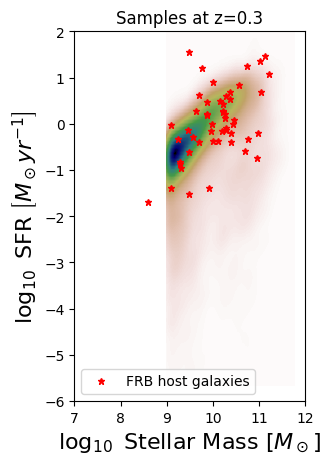

In [656]:
"""
Example:
Generate samples with continuity model and optical selection bias,
plot results with FRB host galaxies
Note: the background density represents a single redshift, whereas each host-
      galaxy has different z, and plotted here just for a crude comparison.
"""

z = 0.3  # np.median(frb_hosts['z'])  # 0.2417

# Create logpdf
logpdf = logpdfs.get_logpdf(z, prob_density)
# logpdf = logpdfs.get_weighted_logpdf(logpdf, 1, 0)  # mass-weighted, no optical lnprior
# logpdf = get_wlogpdf_w_opt(z, prob_density, 1, 0)  # mass-weighted with optical lnprior
# logpdf = get_wlogpdf_w_opt(z, prob_density, 0, 1)  # sfr-weighted with optical lnprior
# logpdf = get_gc_logpdf_w_opt(z, prob_density)  # gc-weighted with optical lnprior
logpdf = lnprior_optical_bias(logpdf, z_to_selection_factor[z],
                              metallicity_fix=True)  # metallicity-weighted

# Generate samples
logpdf_samples = mc.get_samples(logpdf, steps=1000)

# Plot samples
ax,_, _ = mc.plot_from_samples(logpdf_samples)

# Further customization
ax.plot(np.log10(frb_hosts['Mstar']), np.log10(frb_hosts['SFR']),
        '*', color='red', markersize=5, label="FRB host galaxies")
ax.set_xlim([7, 12])
ax.set_ylim([-6,2])
ax.set_xlabel(r"$\log_{10}$" + " Stellar Mass " + r"$\left[M_\odot\right]$", fontsize=16)
ax.set_ylabel(r"$\log_{10}$" + " SFR " + r"$\left[M_\odot yr^{-1}\right]$", fontsize=16)
ax.set_title(f"Samples at z={z}")
ax.legend()
plt.show()

In [446]:
# Example: calculate p90, pnom
frb_values = np.vstack([np.log10(frb_hosts['Mstar']) ,np.log10(frb_hosts['SFR']), frb_hosts['z']])
z_to_logpdf = logpdfs.create_z_to_logpdf(frb_hosts, prob_density, 1, 0)  # mass-weighted
frbs_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)
p90, pnom, _, _ = mc.calc_p90(frb_hosts, z_to_logpdf, frbs_likelihood)
print(p90, pnom)

Generating samples for each redshift: 100%|██████████| 51/51 [00:19<00:00,  2.64hosts/s]
Calculating likelihoods based on halfnorms values: 100%|██████████| 10000/10000 [00:05<00:00, 1911.08it/s]

0.10678125 0.096


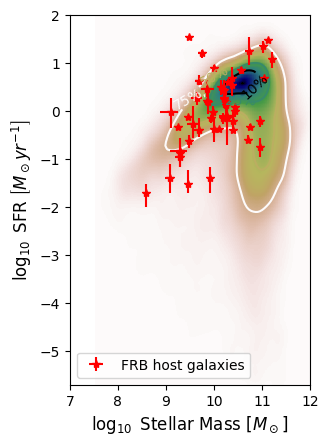

In [685]:
''' Figure 1 '''
from scipy.interpolate import interp1d

z = 0.3  # np.median(frb_hosts['z'])  # 0.2417

# Create logpdf
# logpdf = get_wlogpdf_w_opt(z, prob_density, 1, 0)  # mass-weighted
# logpdf = get_wlogpdf_w_opt(z, prob_density, 0, 1)  # sfr-weighted
logpdf = get_wlogpdf_w_opt(z, prob_density, 1, 10**9.62)  # a/b peak
# logpdf = get_gc_logpdf_w_opt(z, prob_density)  # gc-weighted

# Generate samples
samples = mc.get_samples(logpdf)
ax, Z, extent = mc.plot_from_samples(samples)

# Add probability contours
steps = 1000
Z = Z/Z.sum()
p = np.linspace(0, Z.max(), steps)
integral_gt_p = ((Z >= p[:,None,None])*Z).sum(axis=(1,2))
f = interp1d(integral_gt_p, p)
p_countours = f(np.array([0.75, 0.5, 0.25, 0.1]))
cont = ax.contour(Z.T, p_countours, cmap=plt.cm.gist_earth_r,
                  extent=extent)
fmt = {}
strs = ['75%,', '50%', '25%', '10%']
for l, s in zip(p_countours, strs):
    fmt[l] = s
ax.clabel(cont, fmt=fmt)

# Plot hosts
xerr = frb_hosts['Mstar_lowerr'], frb_hosts['Mstar_uperr']  # already in log10
sfr_uperr = [np.log10(frb_hosts['SFR'][i] + frb_hosts['SFR_uperr'][i]) - np.log10(frb_hosts['SFR'][i])
             for i in frb_hosts.index]
sfr_lowerr = [np.log10(frb_hosts['SFR'][i]) - np.log10(frb_hosts['SFR'][i] - frb_hosts['SFR_lowerr'][i])
              for i in frb_hosts.index]
yerr = sfr_lowerr, sfr_uperr
ax.errorbar(np.log10(frb_hosts['Mstar']), np.log10(frb_hosts['SFR']), yerr, xerr, '*r',
           ecolor='red', label='FRB host galaxies')

ax.set_xlim([mmin, mmax])
ax.set_ylim([sfrmin,sfrmax])
ax.set_xlabel(r"$\log_{10}$" + " Stellar Mass " + r"$\left[M_\odot\right]$", fontsize=12)
ax.set_ylabel(r"$\log_{10}$" + " SFR " + r"$\left[M_\odot yr^{-1}\right]$", fontsize=12)
ax.legend()
plt.savefig('Figures/Figure1_ab_peak.pdf', bbox_inches='tight', transparent=True)

In [681]:
''' Table 3 '''

# Create logpdf
# z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, 1, 0)  # mass-weighted with optical lnprior
# z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, 0, 1)  # sfr-weighted with optical lnprior
# z_to_logpdf = {z: get_gc_logpdf_w_opt(z, prob_density)
#                for z in frb_hosts['z']}  # gc-weighted with optical lnprior

frb_hosts = frb_hosts[frb_hosts['Mstar'] > 10**M_C_SHARMA].reset_index()  # remove lower-masses (20210117A)
z_to_logpdf = create_z_to_logpdf_metallicty(frb_hosts, prob_density)  # metallicity-weighted

# Calculate p90 and pnom 3 times
frb_values = np.vstack([np.log10(frb_hosts['Mstar']),
                        np.log10(frb_hosts['SFR']),
                        frb_hosts['z']])
frbs_nominal_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)
p90_vals = []
p_nom_vals = []
for _ in range(5):
    
    p_90, p_nom, _, _ = mc.calc_p90(frb_hosts, z_to_logpdf, frbs_nominal_likelihood)
    p90_vals.append(p_90)
    p_nom_vals.append(p_nom)

print("p90 average", np.average(p90_vals), "std", np.std(p90_vals))
print("pnom average", np.average(p_nom_vals), "std", np.std(p_nom_vals))

# Print to use later for Figure 3 infinity-points (mass-weighted, sfr-weighted)
print(p90_vals)
print(p_nom_vals)

Generating samples for each redshift: 100%|██████████| 50/50 [00:18<00:00,  2.73hosts/s]


p90 average 0.08795 std 0.014087569321036187
pnom average 0.08108125 std 0.014141798639140639
[np.float64(0.065875), np.float64(0.096125), np.float64(0.10221875), np.float64(0.07693749999999999), np.float64(0.09859375)]
[np.float64(0.0600625), np.float64(0.08940624999999999), np.float64(0.09575), np.float64(0.0684375), np.float64(0.09175)]


In [676]:
''' Conservative set - Table 3'''

high_z = frb_hosts[frb_hosts['z'] > 0.2]
high_m = high_z[np.log10(high_z['Mstar']) > leja_utils.cosmos15_mass_completeness(high_z['z'])]

coservative_hosts = high_m.reset_index()

# run Table 3 cell with coservative_hosts
# REMINDER - add get_logpdf(...,continuity=False) in get_wlogpdf_w_opt
#            and also in get_gc_logpdf_w_opt when doing gc-weighted

# Create logpdf
# z_to_logpdf = create_z_to_logpdf_w_opt(coservative_hosts, prob_density, 1, 0)  # mass-weighted with optical lnprior
# z_to_logpdf = create_z_to_logpdf_w_opt(coservative_hosts, prob_density, 0, 1)  # sfr-weighted with optical lnprior
# z_to_logpdf = {z: get_gc_logpdf_w_opt(z, prob_density)
#                for z in coservative_hosts['z']}  # gc-weighted with optical lnprior
z_to_logpdf = create_z_to_logpdf_metallicty(frb_hosts, prob_density)  # metallicity-weighted

# Calculate p90 and pnom 3 times
frb_values = np.vstack([np.log10(coservative_hosts['Mstar']),
                        np.log10(coservative_hosts['SFR']),
                        coservative_hosts['z']])
frbs_nominal_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)
p90_vals = []
p_nom_vals = []
for _ in range(5):
    
    p_90, p_nom, _, _ = mc.calc_p90(coservative_hosts, z_to_logpdf, frbs_nominal_likelihood)
    p90_vals.append(p_90)
    p_nom_vals.append(p_nom)

print("p90 average", np.average(p90_vals), "std", np.std(p90_vals))
print("pnom average", np.average(p_nom_vals), "std", np.std(p_nom_vals))

print(p90_vals)
print(p_nom_vals)


Generating samples for each redshift: 100%|██████████| 29/29 [00:11<00:00,  2.59hosts/s]


p90 average 0.07157499999999999 std 0.014158858755210463
pnom average 0.05999375 std 0.01249095610331731
[np.float64(0.081), np.float64(0.09240625), np.float64(0.07215624999999999), np.float64(0.05753125), np.float64(0.05478125)]
[np.float64(0.0683125), np.float64(0.0783125), np.float64(0.060656249999999995), np.float64(0.04740625), np.float64(0.045281249999999995)]


Generating samples for each redshift: 100%|██████████| 51/51 [00:31<00:00,  1.61hosts/s]


90% conf p-value: 0.02884375
nominal p-value: 0.02640625


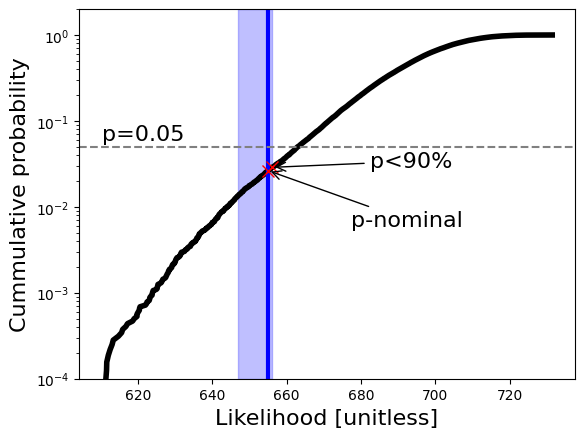

In [671]:
''' Figure 2 '''
import matplotlib.patches as patches

# Create z to logpdf
# z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, 1, 0)  # mass-weighted with optical lnprior
# z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, 0, 1)  # sfr-weighted with optical lnprior
z_to_logpdf = {z: get_gc_logpdf_w_opt(z, prob_density)
               for z in frb_hosts['z']}  # gc-weighted with optical lnprior
# z_to_logpdf = create_z_to_logpdf_metallicty(frb_hosts, prob_density)  # metallicity-weighted
frb_values = np.vstack([np.log10(frb_hosts['Mstar']),
                        np.log10(frb_hosts['SFR']),
                        frb_hosts['z']])

# Calculate p_90 and p_nom        
frbs_nominal_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)
p_90, p_nom, samples_cdf, lklhds_cdf = mc.calc_p90(frb_hosts, z_to_logpdf, frbs_nominal_likelihood)

# Add a rectangle from 10% to 90%
bottom, top = lklhds_cdf.y[1], lklhds_cdf.y[-1]
left, right = np.percentile(lklhds_cdf.x, [10, 90])
rect = patches.Rectangle((left, bottom), right - left,
                         2 * top - bottom, # because plotting with ylim<2*tpo
                         color='blue')  
rect.set_alpha(0.25)

ax = plt.gca()
ax.plot(samples_cdf.x, samples_cdf.y, color='black', linewidth=4)
ax.add_patch(rect)
ax.set_yscale('log', nonpositive='clip')
ax.set_ylim([bottom, 2*top])  # a bit higher than top to see all CDF

# Nominal pvalue line
ax.axvline(frbs_nominal_likelihood, color='blue', label='FRBs nominal likelihood', linewidth=3)

# p=0.05 line
ax.axhline(0.05, color='grey', linestyle='--')
ax.annotate('p=0.05', fontsize=16,
            xy=(samples_cdf.x[2], 0.06))  # change manually x location

# draw intesection points and annotate
ax.plot(frbs_nominal_likelihood, p_nom,
        marker='x', markersize=8, color='red')
ax.annotate('p-nominal',
            xy=(frbs_nominal_likelihood, p_nom), xycoords='data', fontsize=16,
            xytext=(100, -40), textcoords='offset points',  # change manually
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='center')

ax.plot(right, p_90, marker='x', markersize=8, color='red')
ax.annotate('p<90%',
            xy=(right, p_90), xycoords='data',  fontsize=16,
            xytext=(70, 0), textcoords='offset points',  # change manually
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='left')

plt.xlabel('Likelihood [unitless]', fontsize=16)
plt.ylabel('Cummulative probability', fontsize=16)

# plt.savefig('Figures/Figure2_sfr.pdf', bbox_inches='tight', transparent=True)
print('90% conf p-value:', p_90)
print('nominal p-value:', p_nom)

In [585]:
from tqdm.notebook import tqdm

''' a-b with p<90% (for Figure 3) '''
N_AVG_PER_AB = 3

log_ab_frac = np.linspace(-15, -6, 50)  # ratio between log10(a/b)
frb_values = np.vstack([np.log10(frb_hosts['Mstar']),
                        np.log10(frb_hosts['SFR']),
                        frb_hosts['z']])

ab_p90_pvals = []
ab_pnom_pvals = []
ab_p90_errs = []  # list of attemps per ab (length is len(ab_pvals), each element is a list of N_AVG_PER_AB)
ab_pnom_errs = []

print("This might take a while. About 2 minutes per a/b ratio")
for log_f in tqdm(log_ab_frac, desc="Calculating a/b ratios"):
    # print("Starting", np.where(log_ab_frac == log_f)[0][0], "/", len(log_ab_frac))
    f = 10 ** log_f
    # solutiosn to a/b=f and a+b=1
    a = f / (1+f)
    b = 1 / (1+f)
    
    z_to_logpdf = create_z_to_logpdf_w_opt(frb_hosts, prob_density, a, b)
    frbs_nominal_likelihood = mc.calc_weighted_likelihood(z_to_logpdf, frb_values.T)

    p90_per_ab = []
    pnom_per_ab = []
    for _ in tqdm(range(N_AVG_PER_AB), desc=f"Averaging result for a/b ratio",
                  leave=False):
        try:
            mc.TQDM_DISABLE = True
            p90, pnom, _, _ = mc.calc_p90(frb_hosts, z_to_logpdf, frbs_nominal_likelihood)
            mc.TQDM_DISABLE = False
            p90_per_ab.append(p90)
            pnom_per_ab.append(pnom)
        except TypeError as err:
            print(err)
            continue
    
    ab_p90_errs.append(p90_per_ab)        
    ab_pnom_errs.append(pnom_per_ab)        
    ab_p90_pvals.append(np.average(p90_per_ab))
    ab_pnom_pvals.append(np.average(pnom_per_ab))   

with open('ab_frac_26_02_25.csv', 'w') as f:
    f.write('log_ab,pval,errs\n')
    f.writelines(['{},{},{},{},{}\n'.format(log_ab_frac[i], ab_p90_pvals[i], ab_pnom_pvals[i],
                                            ab_p90_errs[i],ab_pnom_errs[i]) for i in range(len(log_ab_frac))])


This might take a while. About 2 minutes per a/b ratio


Calculating a/b ratios:   0%|          | 0/50 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

Averaging result for a/b ratio:   0%|          | 0/3 [00:00<?, ?it/s]

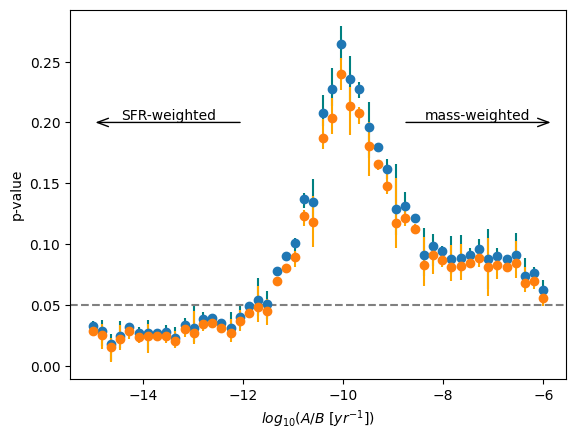

In [ ]:
''' Figure 3 setup '''
import matplotlib.patches as mpatches

def ab_vals_from_csv(csv_path):
    '''
    Serialize values from csv
    :param csv_path: path to csv file
    :return: tuple of log_ab_frac, ab_pvals and 
    '''
    log_ab_frac = []
    p90_vals = []
    pnom_vals = []
    errs_90 = []
    errs_nom = []

    with open(csv_path) as f:
        f.readline()  # headers line
        for l in f.readlines():
            # frac, p90,pnom,[np.float64(p90_1), np.float64(p90_2), np.float64(p90_3)],
            #                [np.float64(pnom_1), np.float64(pnom_2), np.float64(pnom_3)]\n
            frac, p90, pnom, *errs = l.split(",")
            frac = float(frac)
            p90 = float(p90)
            pnom = float(pnom)
            err_90 = [float(errs[0].strip('[np.float64(').rstrip(')')),
                      float(errs[1].strip(' np.float64(').rstrip(')')),
                      float(errs[2].strip(' np.float64(').rstrip(')]'))]
            err_nom = [float(errs[3].strip('[np.float64(').rstrip(')')),
                       float(errs[4].strip(' np.float64(').rstrip(')')),
                       float(errs[5].strip(' np.float64(').rstrip(')]\n'))]
        
            log_ab_frac.append(frac)
            p90_vals.append(p90)
            pnom_vals.append(pnom)
            errs_90.append(err_90)
            errs_nom.append(err_nom)

    return log_ab_frac, p90_vals, pnom_vals, errs_90, errs_nom

fracs, pvals_90, pvals_nom, errs_90, errs_nom = ab_vals_from_csv('ab_frac_26_02_25.csv')

yerr_90 = np.transpose([[max(errs_90[i])-p,p-min(errs_90[i])] for i,p in enumerate(pvals_90)])
yerr_nom = np.transpose([[max(errs_nom[i])-p,p-min(errs_nom[i])] for i,p in enumerate(pvals_nom)])

ax = plt.gca()
plt.errorbar(fracs, pvals_90, yerr_90, fmt='o', ecolor='teal')
plt.errorbar(fracs, pvals_nom, yerr_nom, fmt='o', ecolor='orange')


plt.xlabel('$log_{10}(A/B~[yr^{-1}])$')
plt.ylabel('p-value')
plt.axhline(0.05, color='grey', linestyle='--')

# add mass-weighted and sfr-weighted direction arrows
sfr_arrow = mpatches.FancyArrowPatch((-12, 0.2), (-15, 0.2),
                                     arrowstyle='->,head_width=.15',
                                     mutation_scale=20)
mass_arrow = mpatches.FancyArrowPatch((-8.8, 0.2), (-5.8, 0.2),
                                      arrowstyle='->,head_width=.15',
                                      mutation_scale=20)
ax.add_patch(mass_arrow)
ax.add_patch(sfr_arrow)
ax.annotate("mass-weighted", (.5, .5), xycoords=mass_arrow, ha='center', va='bottom')
ax.annotate("SFR-weighted", (.5, .5), xycoords=sfr_arrow, ha='center', va='bottom')

#plt.savefig('Figures/Figure3_no_inf_points.pdf', bbox_inches='tight', transparent=True)

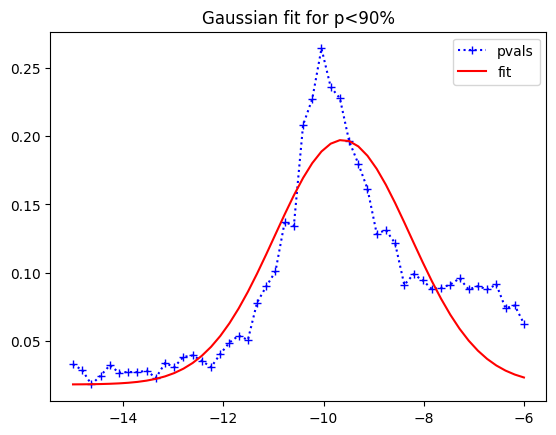

mean: -9.619067741092403
cov: 1.3573608878558514


In [684]:
''' Gaussian fit Figure 3 '''
from scipy.optimize import curve_fit

# replace between pvals_90 and pvals_nom, pick which ones to fit to
curr_pvals = pvals_90
n = len(curr_pvals)
mean = sum(np.array(fracs) * np.array(curr_pvals))/n
sigma = np.sqrt(sum(curr_pvals*(fracs-mean)**2)/n)

def gauss(x,a,x0,sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + np.min(curr_pvals)
    

popt,pcov = curve_fit(gauss, fracs, curr_pvals, p0=[1, mean, sigma])

plt.plot(fracs, curr_pvals, 'b+:', label='pvals')
plt.plot(fracs, gauss(fracs, *popt), 'r-', label='fit')
plt.legend()
plt.title('Gaussian fit for p<90%')  # repalce title between p<90% and p_nom
plt.show()
print('mean:', popt[1])
print('cov:', popt[2])

In [604]:
''' Figure 3 - add mass-weighted and sfr-weighted points to a/b plot '''

# Values taken from Table 3 cell
mass_weighted_errs_90 = [np.float64(0.07540625), np.float64(0.06790625), np.float64(0.081375), np.float64(0.07643749999999999), np.float64(0.08540625)]
mass_weighted_errs_nom = [np.float64(0.0675), np.float64(0.0613125), np.float64(0.07546875), np.float64(0.0710625), np.float64(0.07853125)]
sfr_weighted_errs_90 = [np.float64(0.0095), np.float64(0.029437500000000002), np.float64(0.029781250000000002), np.float64(0.037406249999999995), np.float64(0.03215625)]
sfr_weighted_errs_nom = [np.float64(0.0073750000000000005), np.float64(0.025718750000000002), np.float64(0.0260625), np.float64(0.03328125), np.float64(0.02875)]

# pvals
mass_nom = np.average(mass_weighted_errs_nom)
mass_90 = np.average(mass_weighted_errs_90)
sfr_nom = np.average(sfr_weighted_errs_nom)
sfr_90 = np.average(sfr_weighted_errs_90)

# error bars
mass_yerr_nom = np.transpose([max(mass_weighted_errs_nom)-mass_nom,mass_nom-min(mass_weighted_errs_nom)])
mass_yerr_90 = np.transpose([max(mass_weighted_errs_90)-mass_90,mass_90-min(mass_weighted_errs_90)])
sfr_yerr_nom = np.transpose([max(sfr_weighted_errs_nom)-sfr_nom,sfr_nom-min(sfr_weighted_errs_nom)])
sfr_yerr_90 = np.transpose([max(sfr_weighted_errs_90)-sfr_90,sfr_90-min(sfr_weighted_errs_90)])

In [608]:
sfr_nom, sfr_90

(np.float64(0.024237500000000002), np.float64(0.02765625))

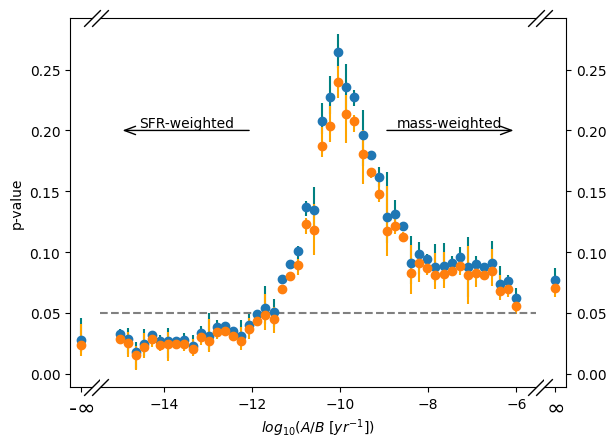

In [607]:
''' Figure 3 - with broken axes '''

fig = plt.figure()
gs = plt.GridSpec(1, 3, width_ratios=[1, 20, 1])

minf_ax = fig.add_subplot(gs[0])
mid_ax = fig.add_subplot(gs[1], sharey=minf_ax)
inf_ax = fig.add_subplot(gs[2], sharey=minf_ax)

# plot the same data on both axes
mid_ax.errorbar(fracs, pvals_90, yerr_90, fmt='o', ecolor='teal')
mid_ax.errorbar(fracs, pvals_nom, yerr_nom, fmt='o', ecolor='orange')

# plot sfr weighted
minf_ax.errorbar(0, sfr_90, yerr=sfr_yerr_90.reshape((2,1)), fmt='o', ecolor='teal')
minf_ax.errorbar(0, sfr_nom, yerr=sfr_yerr_nom.reshape((2,1)), fmt='o', ecolor='orange')
minf_ax.set_xticks([0], [r"-$\infty$"], fontsize=16)

# plot mass weighted
inf_ax.errorbar(0, mass_90, yerr=mass_yerr_90.reshape((2,1)), fmt='o', ecolor='teal')
inf_ax.errorbar(0, mass_nom, yerr=mass_yerr_nom.reshape((2,1)), fmt='o', ecolor='orange')
inf_ax.set_xticks([0], [r"$\infty$"], fontsize=16)

mid_ax.set_xlabel('$log_{10}(A/B~[yr^{-1}])$')
minf_ax.set_ylabel('p-value')
mid_ax.axhline(0.05, color='grey', linestyle='--')

# add mass-weighted and sfr-weighted direction arrows
sfr_arrow = mpatches.FancyArrowPatch((-12, 0.2), (-15, 0.2),
                                     arrowstyle='->,head_width=.15',
                                     mutation_scale=20)
mass_arrow = mpatches.FancyArrowPatch((-9, 0.2), (-6, 0.2),
                                      arrowstyle='->,head_width=.15',
                                      mutation_scale=20)
mid_ax.add_patch(mass_arrow)
mid_ax.add_patch(sfr_arrow)
mid_ax.annotate("mass-weighted", (.5, .5), xycoords=mass_arrow, ha='center', va='bottom')
mid_ax.annotate("SFR-weighted", (.5, .5), xycoords=sfr_arrow, ha='center', va='bottom')

# cosmetics
minf_ax.spines['right'].set_visible(False)  # hide the spines between axes
mid_ax.spines['left'].set_visible(False)
mid_ax.spines['right'].set_visible(False)
inf_ax.spines['left'].set_visible(False)
mid_ax.xaxis.tick_bottom()  # show ticks only in bottom
mid_ax.yaxis.set_visible(False)  # hide y axes (show only in left ax)
#inf_ax.yaxis.set_visible(False)
inf_ax.yaxis.tick_right()

# Make the spacing between the two axes a bit smaller
plt.subplots_adjust(wspace=0.05)

# שׁdd slanted lines
d = 1  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
minf_ax.plot([1, 1], [0, 1], transform=minf_ax.transAxes, **kwargs)
mid_ax.plot([0, 0, 1, 1], [0, 1, 0, 1], transform=mid_ax.transAxes, **kwargs)
inf_ax.plot([0, 0], [0, 1], transform=inf_ax.transAxes, **kwargs)

plt.savefig('Figures/Figure3.pdf', bbox_inches='tight', transparent=True)

In [ ]:
# TODO:
# 2. make metallicity pval add to table 3